# **Clustering Belo Horizonte's Neighborhoods by Popularity of Food Venues' Categories**

##### **Felipe Resende Nogueira | IBM Data Science Professional Certificate Capstone Project | 05/2020**

### **Introduction:**

Opening a food establishment requires great investment of both time and money, specially in Brazil, which is famous for its long bureaucratic processes for registering a new business. Therefore, it is prudent and expected of any entrepreneur to study the market and to search for its best opportunities before making a decision. This report was developed specially for providing entrepreneurs from Belo Horizonte a reliable and data-driven segmentation of the city neighborhoods in groups formed by similarity of most popular venue categories among its food venues. This analysis is meant to deliver insights on where a particular type of food establishment would have greater chances of acceptance by the public, and also to reveal neighborhoods with untapped potential for particular establishment types.  

### **Data Requirements:**

In order to successfully complete the analysis, data from three different sources will be collected:  
* A table with the names of all Belo Horizonte's neighborhoods with their area and population values. The table is available on Wikipedia and is based on IBGE's (Brazilian Institute of Geography and Statistics) latest census. Access through this link: https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Belo_Horizonte;
* Coordinates for each neighborhood. These will be collected through Python's Geopy.geocode module;
* A list with venues' names, categories, latitude and longitude within a determined radius for each neighborhood. Also, a list containing all food venue category names recognized by the Foursquare API. The venues' information will be collected by using the Foursquare API.

### **Execution:**

**Importing all needed dependencies:**

In [1]:
import numpy as np
import pandas as pd
!pip install beautifulsoup4
from bs4 import BeautifulSoup
import requests
import urllib.request
from bs4 import SoupStrainer
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import json
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

     |████████████████████████████████| 122kB 6.6MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing tra

**Making a request to get the HTML code of the URL that contains the table with neighborhood names:**

The website can be accessed through this link: https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Belo_Horizonte

In [2]:
URL = "https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Belo_Horizonte"
r = requests.get(URL)
html_content = r.text

**Parsing the HTML code using BeautifulSoup library resources in order to get only the desired table content:**

In [3]:
only_table_tags = SoupStrainer("table")
soup = BeautifulSoup(html_content, "html.parser", parse_only=only_table_tags) # returns all tables from html document
soup = soup.find_all('table')[3] # returns only the wanted table
print(soup.prettify()[:1248]) # prints the columns and the first two rows of the organized tree

<table border="1" cellpadding="0" cellspacing="1" class="wikitable sortable" style="margin: 1 1 1em 1em; align=center background: #f9f9f9; border: 1px #aaa solid; border-collapse: collapse; font-size: 95%;">
 <tbody>
  <tr style="background-color:#E9E9E9">
   <th style="width: 20px;">
    #
   </th>
   <th style="width: 20px;">
    Zonas Cardeais
   </th>
   <th style="width: 160px; text-align: center;">
    Administração Regionais
   </th>
   <th style="width: 200px; text-align: center;">
    Bairros, territórios, vilas e favelas
   </th>
   <th style="width: 20px; text-align: center;">
    População (2010)
   </th>
   <th style="width: 20px; text-align: center;">
    Área (km²)
   </th>
  </tr>
  <tr>
   <td align="center">
    1
   </td>
   <td align="center">
    ZONA LESTE
   </td>
   <td align="center">
    Leste
   </td>
   <td align="left">
    Sagrada Família
   </td>
   <td align="right">
    34 395
   </td>
   <td align="right">
    2,291
   </td>
  </tr>
  <tr>
   <td align

**Creating an empty Pandas Dataframe:**

In [4]:
BH_nbh_df = pd.DataFrame(columns=['ID','Cardenal Zone','Region', 'Neighborhood', 'Population', 'Area (km^2)'])
BH_nbh_df

,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2)


**Filling the dataframe with BeautifulSoup object's data:**

In [5]:
row_marker = 0
for row in soup.find_all('tr'): # loops through all soup object's table rows
    column_marker = 0 # identifies the column number
    row_itens = row.find_all('td') 
    listt = [0, 0, 0, 0, 0, 0] # will be filled with a row's content and transformed to a new dataframe
    for row_item in row_itens: # loops through the values of a determined row
        listt[column_marker] = row_item.get_text().replace('\n','').strip() # fills the listt array with the row's values
        column_marker += 1
    df = pd.DataFrame([listt], columns=['ID','Cardenal Zone','Region', 'Neighborhood', 'Population', 'Area (km^2)']) # creates new dataframe containing one row
    BH_nbh_df = BH_nbh_df.append(df) # appends the new dataframe to the original
    row_marker += 1
BH_nbh_df.reset_index(inplace = True, drop = True)
BH_nbh_df.drop(BH_nbh_df.index[0], inplace = True)
BH_nbh_df.reset_index(inplace = True, drop = True)
BH_nbh_df

,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2)
0,1,ZONA LESTE,Leste,Sagrada Família,34 395,"2,291"
1,2,ZONA SUL,Oeste,Buritis,29 374,"3,823"
2,3,ZONA OESTE,Noroeste,Padre Eustáquio,28 773,"2,969"
3,4,ZONA OESTE,Barreiro,Lindéia,25 231,"2,012"
4,5,ZONA NORTE,Pamp./ Venda Nova,Santa Mônica,23 883,"2,178"
...,...,...,...,...,...,...
498,483,ZONA LESTE,Nordeste,Guanabara,0,"0,002"
499,484,ZONA NORTE,Pampulha,Lagoa da Pampulha,0,"3,138"
500,485,ZONA NORTE,Noroeste,Sumaré,0,"0,149"
501,486,ZONA LESTE,Leste,Vila Vera Cruz I,0,"0,008"


Only by looking at the output sample, we can identify three potential problems to the analysis:  
* The ID's maximum value is 487, whereas the index's maximum value is 503. By investigating the original dataset, I discovered that this happens because some neighborhoods have been partitioned into two, even though their neighborhood's ID was maintained. Python's geocode method may not understand this division, thus we're going to remove the duplicate rows and keep the original neighborhoods.
* There are some neighborhoods with no population registered at all. As this report is meant to provide entrepreneurs valuable information regarding neighborhoods with potential of good acceptance of a determined category of food establishment, it is important for the neighborhood to be well populated. Hence, a minimum population value will be set for a neighborhood to be considered on the analysis.
* There are some neighborhoods with very small area values. It becomes a problem because later we're going to have to set a radius value to search for venues around each neighborhood. Therefore, neighborhoods that are really small will end up considering mostly establishments that actually belong to other neighborhoods. A minimum value will also be set for neighborhood area, then.

**Transforming Population and Area values from strings to integers:**

For some reason the spaces between numbers on the population column have been encoded as '\xa0'. I have not been able to fix it with Pandas dataframe methods, so I will load the column data into a list and slice the strings there. Afterwards, the fixed data will be added back to the dataframe and transformed to float values.

In [6]:
pop_list = BH_nbh_df['Population'].tolist()
new_list = [None] * 503
for i in range(503): # Loops through each row of the dataframe and adds the fixed string to a list.
    try:
        new_list[i] = pop_list[i].replace('\xa0','')
    except:
        new_list[i] = pop_list[i]
print('New list\'s beggining: ', new_list[:10])
print('New list\'s end: ', new_list[494:])

New list's beggining:  ['34395', '29374', '28773', '25231', '23883', '23817', '15803', '6503', '21642', '21459']
New list's end:  ['8', '0', '0', '0', '0', '0', '0', '0', '0']


In [7]:
# Transforms population values from string to float.
BH_nbh_df['Population'] = new_list
BH_nbh_df['Population'] = BH_nbh_df['Population'].astype(float)
print('The population column\'s values have succesfully been transformed to floats.')
BH_nbh_df.head()

The population column's values have succesfully been transformed to floats.


,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2)
0,1,ZONA LESTE,Leste,Sagrada Família,34395.0,"2,291"
1,2,ZONA SUL,Oeste,Buritis,29374.0,"3,823"
2,3,ZONA OESTE,Noroeste,Padre Eustáquio,28773.0,"2,969"
3,4,ZONA OESTE,Barreiro,Lindéia,25231.0,"2,012"
4,5,ZONA NORTE,Pamp./ Venda Nova,Santa Mônica,23883.0,"2,178"


In [8]:
# Transforms area values from string to float.
BH_nbh_df['Area (km^2)'] = BH_nbh_df['Area (km^2)'].str.replace(',','.')
BH_nbh_df['Area (km^2)'] = BH_nbh_df['Area (km^2)'].astype(float)
print('The Area column\'s values have succesfully been transformed to floats.')
BH_nbh_df

The Area column's values have succesfully been transformed to floats.


,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2)
0,1,ZONA LESTE,Leste,Sagrada Família,34395.0,2.291
1,2,ZONA SUL,Oeste,Buritis,29374.0,3.823
2,3,ZONA OESTE,Noroeste,Padre Eustáquio,28773.0,2.969
3,4,ZONA OESTE,Barreiro,Lindéia,25231.0,2.012
4,5,ZONA NORTE,Pamp./ Venda Nova,Santa Mônica,23883.0,2.178
...,...,...,...,...,...,...
498,483,ZONA LESTE,Nordeste,Guanabara,0.0,0.002
499,484,ZONA NORTE,Pampulha,Lagoa da Pampulha,0.0,3.138
500,485,ZONA NORTE,Noroeste,Sumaré,0.0,0.149
501,486,ZONA LESTE,Leste,Vila Vera Cruz I,0.0,0.008


**Removing duplicate neighborhoods and aggregating their area and population values into one:**

In [9]:
BH_nbh_df['ID'] = BH_nbh_df['ID'].astype(int)
BH_nbh_df.sort_values("ID")
i = 0
while True:                                                                     # Loops through each row of the dataframe and tests if
    try:                                                                        # the row's ID is equal to the ID from the row right below.
        if BH_nbh_df.iloc[i,0] == BH_nbh_df.iloc[i+1,0]:                        # If yes, area and population values of both rows are summed
            BH_nbh_df.iloc[i,4] = BH_nbh_df.iloc[i+1,4] + BH_nbh_df.iloc[i,4]   # and stored in the current row, while the below row is
            BH_nbh_df.iloc[i,5] = BH_nbh_df.iloc[i+1,5] + BH_nbh_df.iloc[i,5]   # deleted from the dataframe.
            BH_nbh_df.drop(i+1,axis=0,inplace=True)
            BH_nbh_df.reset_index(inplace=True, drop=True)
            i = i - 1
    except:
        break
    i = i + 1
    
BH_nbh_df.reset_index(drop=True,inplace=True)
BH_nbh_df

,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2)
0,1,ZONA LESTE,Leste,Sagrada Família,34395.0,2.291
1,2,ZONA SUL,Oeste,Buritis,29374.0,3.823
2,3,ZONA OESTE,Noroeste,Padre Eustáquio,28773.0,2.969
3,4,ZONA OESTE,Barreiro,Lindéia,25231.0,2.012
4,5,ZONA NORTE,Pamp./ Venda Nova,Santa Mônica,23883.0,2.178
...,...,...,...,...,...,...
482,483,ZONA LESTE,Nordeste,Guanabara,0.0,0.002
483,484,ZONA NORTE,Pampulha,Lagoa da Pampulha,0.0,3.138
484,485,ZONA NORTE,Noroeste,Sumaré,0.0,0.149
485,486,ZONA LESTE,Leste,Vila Vera Cruz I,0.0,0.008


**Generating population's and area's descriptive statistics:**

In [10]:
BH_nbh_df.describe()

,ID,Population,Area (km^2)
count,487.000000,487.000000,487.000000
mean,244.000000,4877.106776,0.680074
std,140.729054,5556.085989,1.226936
min,1.000000,0.000000,0.001000
25%,122.500000,775.500000,0.045000
50%,244.000000,2885.000000,0.310000
75%,365.500000,7042.500000,0.856500
max,487.000000,34395.000000,17.517000


**Analyzing the same descriptive statistics through box plots:**

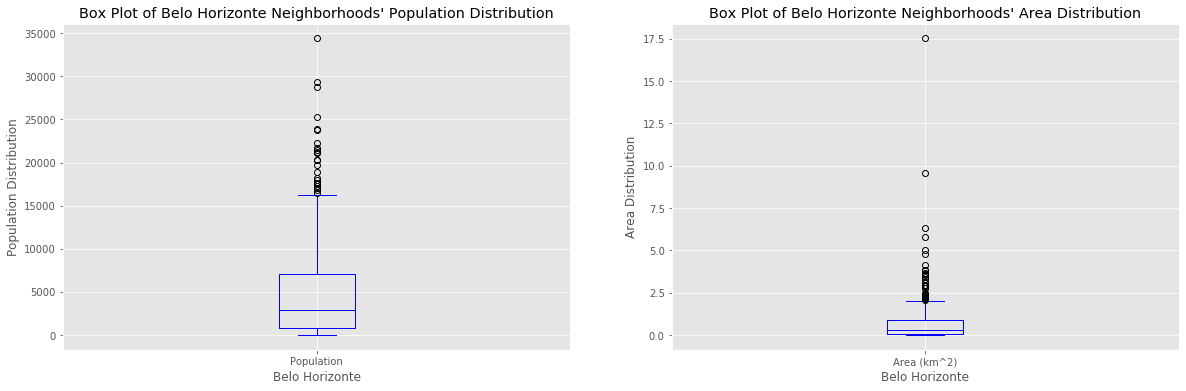

In [11]:
df_pop = BH_nbh_df['Population']
df_area = BH_nbh_df['Area (km^2)']
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_pop.plot(kind='box', color='blue', vert=True, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plot of Belo Horizonte Neighborhoods\' Population Distribution')
ax0.set_xlabel('Belo Horizonte')
ax0.set_ylabel('Population Distribution')

# Subplot 2: Line plot
df_area.plot(kind='box', color='blue', vert=True, figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Box Plot of Belo Horizonte Neighborhoods\' Area Distribution')
ax1.set_ylabel('Area Distribution')
ax1.set_xlabel('Belo Horizonte')

plt.show()

Through these visualizations it becomes clear that we have another problem. Although high population values don't represent any trouble, very high area values might. It doesn't make sense to study super large neighborhoods that aren't well populated. To overcome that, we're also going to set a minimum value for population density.

**Adding a column for population density:**

In [12]:
BH_nbh_df['People per km^2'] = BH_nbh_df['Population'] / BH_nbh_df['Area (km^2)']
BH_nbh_df

,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2),People per km^2
0,1,ZONA LESTE,Leste,Sagrada Família,34395.0,2.291,15013.094718
1,2,ZONA SUL,Oeste,Buritis,29374.0,3.823,7683.494638
2,3,ZONA OESTE,Noroeste,Padre Eustáquio,28773.0,2.969,9691.141799
3,4,ZONA OESTE,Barreiro,Lindéia,25231.0,2.012,12540.258449
4,5,ZONA NORTE,Pamp./ Venda Nova,Santa Mônica,23883.0,2.178,10965.564738
...,...,...,...,...,...,...,...
482,483,ZONA LESTE,Nordeste,Guanabara,0.0,0.002,0.000000
483,484,ZONA NORTE,Pampulha,Lagoa da Pampulha,0.0,3.138,0.000000
484,485,ZONA NORTE,Noroeste,Sumaré,0.0,0.149,0.000000
485,486,ZONA LESTE,Leste,Vila Vera Cruz I,0.0,0.008,0.000000


**Generating descriptive statistics:**

In [13]:
BH_nbh_df.describe()

,ID,Population,Area (km^2),People per km^2
count,487.000000,487.000000,487.000000,487.000000
mean,244.000000,4877.106776,0.680074,15820.047872
std,140.729054,5556.085989,1.226936,19913.620108
min,1.000000,0.000000,0.001000,0.000000
25%,122.500000,775.500000,0.045000,7996.507048
50%,244.000000,2885.000000,0.310000,11197.883598
75%,365.500000,7042.500000,0.856500,21575.396825
max,487.000000,34395.000000,17.517000,379800.000000


**Visualizing all box plots with outliers in blue and without outliers in red:**

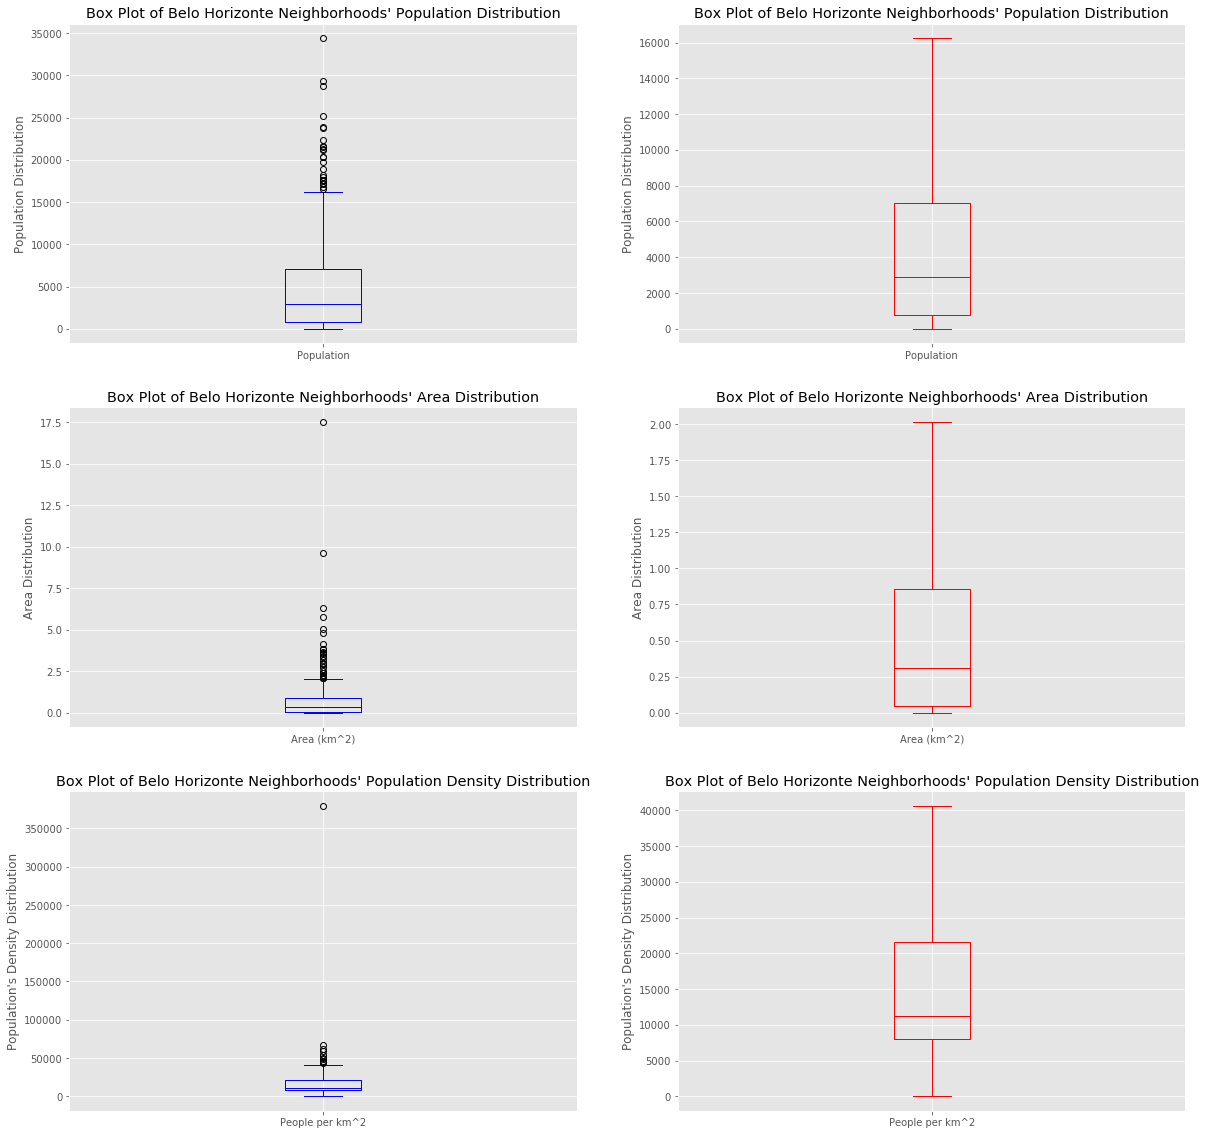

In [14]:
df_pop = BH_nbh_df['Population']
df_area = BH_nbh_df['Area (km^2)']
df_den = BH_nbh_df['People per km^2']
fig = plt.figure()

ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 2)
ax2 = fig.add_subplot(3, 2, 3)
ax3 = fig.add_subplot(3, 2, 4)
ax4 = fig.add_subplot(3, 2, 5)
ax5 = fig.add_subplot(3, 2, 6)

df_pop.plot(kind='box', color='blue', figsize=(20, 20), ax=ax0)
ax0.set_title('Box Plot of Belo Horizonte Neighborhoods\' Population Distribution')
ax0.set_ylabel('Population Distribution')

df_pop.plot(kind='box', color='red', figsize=(20, 20), ax=ax1, showfliers=False)
ax1.set_title('Box Plot of Belo Horizonte Neighborhoods\' Population Distribution')
ax1.set_ylabel('Population Distribution')

df_area.plot(kind='box', color='blue', figsize=(20, 20), ax=ax2)
ax2.set_title ('Box Plot of Belo Horizonte Neighborhoods\' Area Distribution')
ax2.set_ylabel('Area Distribution')

df_area.plot(kind='box', color='red', figsize=(20, 20), ax=ax3, showfliers=False)
ax3.set_title ('Box Plot of Belo Horizonte Neighborhoods\' Area Distribution')
ax3.set_ylabel('Area Distribution')

df_den.plot(kind='box', color='blue', figsize=(20, 20), ax=ax4)
ax4.set_title('Box Plot of Belo Horizonte Neighborhoods\' Population Density Distribution')
ax4.set_ylabel('Population\'s Density Distribution')

df_den.plot(kind='box', color='red', figsize=(20, 20), ax=ax5, showfliers=False)
ax5.set_title('Box Plot of Belo Horizonte Neighborhoods\' Population Density Distribution')
ax5.set_ylabel('Population\'s Density Distribution')

plt.show()

As I've already appointed earlier, neighborhoods with very small area values will be excluded from the analysis. Therefore, an arbitrary minimum value of 0.02 km^2 has been set to avoid considering small villages on the sample.

**Removing rows with Area value lower than 0.02:**

In [15]:
BH_nbh_df = BH_nbh_df[BH_nbh_df['Area (km^2)'] >= 0.02]
BH_nbh_df.reset_index(inplace=True, drop=True)
print("The new dataframe has {} rows.".format(BH_nbh_df.shape[0]))
BH_nbh_df.sort_values(by='Area (km^2)').head(10)

The new dataframe has 416 rows.


,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2),People per km^2
397,422,ZONA NORTE,Venda Nova,Vila SESC,343.0,0.020,17150.000000
410,465,ZONA LESTE,Leste,Camponesa I,122.0,0.020,6100.000000
406,448,ZONA OESTE,Oeste,Vila Betânia,195.0,0.020,9750.000000
373,380,ZONA NORTE,Noroeste,Vila Maloca,663.0,0.021,31571.428571
380,394,ZONA OESTE,Oeste,Vila Calafate,529.0,0.021,25190.476190
368,372,ZONA NORTE,Nordeste,Vila Inestan,701.0,0.021,33380.952381
390,408,ZONA OESTE,Oeste,Vila da Amizade,402.0,0.021,19142.857143
398,424,ZONA LESTE,Leste,Vila da Área,337.0,0.021,16047.619048
366,369,ZONA OESTE,Noroeste,Conjunto Novo Dom Bosco,704.0,0.022,32000.000000
346,348,ZONA LESTE,Nordeste,Vila de Sá,971.0,0.022,44136.363636


An arbitrary minimum value of 1500 people has been set to avoid considering the least populated neighborhoods on the analysis.

**Removing rows with Population values lower than 1500:**

In [16]:
BH_nbh_df = BH_nbh_df[BH_nbh_df['Population'] >= 1500]
BH_nbh_df.reset_index(inplace=True, drop=True)
print("The new dataframe has {} rows.".format(BH_nbh_df.shape[0]))
BH_nbh_df.sort_values(by='Population').head(10)

The new dataframe has 318 rows.


,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2),People per km^2
317,319,ZONA SUL,Barreiro,Bernadete,1516.0,0.139,10906.474820
316,318,ZONA NORTE,Norte,Solimões,1519.0,0.280,5425.000000
315,317,ZONA NORTE,Pampulha,São José,1522.0,0.308,4941.558442
314,316,ZONA OESTE,Noroeste,Vila Trinta e Um de Março,1525.0,0.054,28240.740741
313,315,ZONA SUL,Centro-Sul,Cidade Jardim,1528.0,0.511,2990.215264
312,314,ZONA OESTE,Noroeste,Vila Coqueiral,1533.0,0.068,22544.117647
311,313,ZONA SUL,Oeste/ Barreiro,Olhos d'água,1566.0,3.610,433.795014
310,312,ZONA OESTE,Barreiro,Vila Átila de Paiva,1582.0,0.036,43944.444444
309,311,ZONA SUL,Centro-Sul,Estrela,1591.0,0.072,22097.222222
308,310,ZONA LESTE,Nordeste,São Benedito,1597.0,0.040,39925.000000


An arbitrary value of 5000 people per km^2 has been set to avoid considering neighborhoods with low population density.

**Removing rows with People per km^2 values lower than 5000:**

In [17]:
BH_nbh_df = BH_nbh_df[BH_nbh_df['People per km^2'] >= 5000]
BH_nbh_df.reset_index(inplace=True, drop=True)
print("The new dataframe has {} rows.".format(BH_nbh_df.shape[0]))
BH_nbh_df.sort_values(by='People per km^2').head(10)

The new dataframe has 284 rows.


,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2),People per km^2
168,183,ZONA NORTE,Noroeste,Bonfim (ZN),4448.0,0.880,5054.545455
107,112,ZONA SUL,Oeste,Palmeiras (ZS),7653.0,1.447,5288.873531
282,318,ZONA NORTE,Norte,Solimões,1519.0,0.280,5425.000000
237,259,ZONA NORTE,Venda Nova,Canaã,2614.0,0.480,5445.833333
27,28,ZONA NORTE,Norte,Jaqueline,16195.0,2.940,5508.503401
130,139,HIPERCENTRO,Centro-Sul,Barro Preto,6183.0,1.094,5651.736746
209,229,ZONA LESTE,Nordeste,Dom Joaquim,3279.0,0.580,5653.448276
244,267,ZONA NORTE,Venda Nova,Parque São Pedro,2313.0,0.408,5669.117647
79,82,ZONA NORTE,Pampulha,Itapoã,9476.0,1.629,5817.065684
47,49,ZONA NORTE,Noroeste,Caiçaras,13150.0,2.246,5854.853072


The rows that previously had duplicates still have parentheses that indicated the partitioning of the neighborhood on their Neighborhood column's values. Those need to be removed in order to run the Foursquare requests correctly.

**Slicing Neighborhood column's values in order to remove parentheses and characters within them:**

In [18]:
BH_nbh_df['Neighborhood'] = BH_nbh_df['Neighborhood'].str.strip()
i = 0
n = 0
while True:                                
    try:
        string = BH_nbh_df.iloc[i,3]
        position = string.find('(')
        if position != -1:
            position = position - 1
            BH_nbh_df.iloc[i,3] = string[:position]
            n = n + 1
    except:
        break
    i = i + 1
print("{} values were fixed.".format(n))
BH_nbh_df

13 values were fixed.


,ID,Cardenal Zone,Region,Neighborhood,Population,Area (km^2),People per km^2
0,1,ZONA LESTE,Leste,Sagrada Família,34395.0,2.291,15013.094718
1,2,ZONA SUL,Oeste,Buritis,29374.0,3.823,7683.494638
2,3,ZONA OESTE,Noroeste,Padre Eustáquio,28773.0,2.969,9691.141799
3,4,ZONA OESTE,Barreiro,Lindéia,25231.0,2.012,12540.258449
4,5,ZONA NORTE,Pamp./ Venda Nova,Santa Mônica,23883.0,2.178,10965.564738
...,...,...,...,...,...,...,...
279,312,ZONA OESTE,Barreiro,Vila Átila de Paiva,1582.0,0.036,43944.444444
280,314,ZONA OESTE,Noroeste,Vila Coqueiral,1533.0,0.068,22544.117647
281,316,ZONA OESTE,Noroeste,Vila Trinta e Um de Março,1525.0,0.054,28240.740741
282,318,ZONA NORTE,Norte,Solimões,1519.0,0.280,5425.000000


**Removing columns that won't be used:**

In [19]:
BH_nbh_df.drop(['ID', 'Cardenal Zone', 'Region'], axis=1, inplace=True)
BH_nbh_df

,Neighborhood,Population,Area (km^2),People per km^2
0,Sagrada Família,34395.0,2.291,15013.094718
1,Buritis,29374.0,3.823,7683.494638
2,Padre Eustáquio,28773.0,2.969,9691.141799
3,Lindéia,25231.0,2.012,12540.258449
4,Santa Mônica,23883.0,2.178,10965.564738
...,...,...,...,...
279,Vila Átila de Paiva,1582.0,0.036,43944.444444
280,Vila Coqueiral,1533.0,0.068,22544.117647
281,Vila Trinta e Um de Março,1525.0,0.054,28240.740741
282,Solimões,1519.0,0.280,5425.000000


**Getting geographical coordinates of Belo Horizonte:**

In [20]:
address = 'Belo Horizonte, Minas Gerais'
geolocator = Nominatim(user_agent="BH_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
BH_coordinates = [latitude,longitude]
print('The geograpical coordinate of Belo Horizonte are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Belo Horizonte are -19.9227318, -43.9450948.


**Running a loop to store coordinate values of each neighborhood into lists:**

In [21]:
i = 0
lats = [0]* 284
longs = [0]* 284
while i < 284:
    try:
        nbh = BH_nbh_df.iloc[i,0]
        address = nbh + ', Belo Horizonte'
        geolocator = Nominatim(user_agent="BH_explorer")
        location = geolocator.geocode(address)
        lats[i] = location.latitude
        longs[i] = location.longitude
    except:
        lats[i] = 'No correspondence'
        longs[i] = 'No correspondence'
    i = i + 1
print("The code ran {} times.".format(i))
print("First 10 items of each list:")
lats[:10], longs[:10]

The code ran 284 times.
First 10 items of each list:


([-19.9003321,
  -19.9765791,
  -19.9143045,
  -19.9774137,
  -19.823782950000002,
  -19.8227499,
  -19.8790013,
  -19.9433294,
  -19.91039835,
  -19.792359400000002],
 [-43.9237228,
  -43.9674165,
  -43.97935599013762,
  -44.0506354,
  -43.97452964003257,
  -44.0039799,
  -43.9411052,
  -43.943420252193405,
  -43.89104435209397,
  -43.97004951203863])

**Adding the coordinates to the dataframe:**

In [22]:
BH_nbh_df['Latitude'] = lats
BH_nbh_df['Longitude'] = longs
BH_nbh_df

,Neighborhood,Population,Area (km^2),People per km^2,Latitude,Longitude
0,Sagrada Família,34395.0,2.291,15013.094718,-19.9003,-43.9237
1,Buritis,29374.0,3.823,7683.494638,-19.9766,-43.9674
2,Padre Eustáquio,28773.0,2.969,9691.141799,-19.9143,-43.9794
3,Lindéia,25231.0,2.012,12540.258449,-19.9774,-44.0506
4,Santa Mônica,23883.0,2.178,10965.564738,-19.8238,-43.9745
...,...,...,...,...,...,...
279,Vila Átila de Paiva,1582.0,0.036,43944.444444,-19.9793,-44.0316
280,Vila Coqueiral,1533.0,0.068,22544.117647,-19.9152,-44.0247
281,Vila Trinta e Um de Março,1525.0,0.054,28240.740741,-19.9204,-44.001
282,Solimões,1519.0,0.280,5425.000000,-19.8218,-43.9267


**Removing rows neighborhoods that didn't have coordinates registered by the API:**

In [23]:
BH_nbh_df = BH_nbh_df[BH_nbh_df['Latitude'] != 'No correspondence']
BH_nbh_df

,Neighborhood,Population,Area (km^2),People per km^2,Latitude,Longitude
0,Sagrada Família,34395.0,2.291,15013.094718,-19.9003,-43.9237
1,Buritis,29374.0,3.823,7683.494638,-19.9766,-43.9674
2,Padre Eustáquio,28773.0,2.969,9691.141799,-19.9143,-43.9794
3,Lindéia,25231.0,2.012,12540.258449,-19.9774,-44.0506
4,Santa Mônica,23883.0,2.178,10965.564738,-19.8238,-43.9745
...,...,...,...,...,...,...
279,Vila Átila de Paiva,1582.0,0.036,43944.444444,-19.9793,-44.0316
280,Vila Coqueiral,1533.0,0.068,22544.117647,-19.9152,-44.0247
281,Vila Trinta e Um de Março,1525.0,0.054,28240.740741,-19.9204,-44.001
282,Solimões,1519.0,0.280,5425.000000,-19.8218,-43.9267


Before plotting the neighborhoods on a Folium map, we should verify if the API returned any coordinate combination that isn't from Belo Horizonte. In order to do that, we'll search for absurd coordinate values, which we're sure that don't belong to Belo Horizonte, and exclude the matching neighborhood from the sample.

**Making sure that the coordinates are float types:**

In [24]:
BH_nbh_df['Latitude'] = BH_nbh_df['Latitude'].astype(float)
BH_nbh_df['Longitude'] = BH_nbh_df['Longitude'].astype(float)
BH_nbh_df.dtypes

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighborhood        object
Population         float64
Area (km^2)        float64
People per km^2    float64
Latitude           float64
Longitude          float64
dtype: object

**Searching for strange values of coordinates:**

In [25]:
BH_nbh_df[BH_nbh_df['Latitude'] > -18]

,Neighborhood,Population,Area (km^2),People per km^2,Latitude,Longitude
72,Aparecida,9830.0,0.914,10754.923414,-6.862008,-38.041191
168,Bonfim,4448.0,0.880,5054.545455,3.383197,-59.859820


In [26]:
BH_nbh_df[BH_nbh_df['Latitude'] < -21]

,Neighborhood,Population,Area (km^2),People per km^2,Latitude,Longitude
172,Nossa Senhora da Aparecida,4341.0,0.138,31456.521739,-21.007046,-46.521605


In [27]:
BH_nbh_df[BH_nbh_df['Longitude'] < -45]

,Neighborhood,Population,Area (km^2),People per km^2,Latitude,Longitude
168,Bonfim,4448.0,0.880,5054.545455,3.383197,-59.859820
172,Nossa Senhora da Aparecida,4341.0,0.138,31456.521739,-21.007046,-46.521605


In [28]:
BH_nbh_df[BH_nbh_df['Longitude'] > -42]

,Neighborhood,Population,Area (km^2),People per km^2,Latitude,Longitude
50,Anchieta,12740.0,0.697,18278.335725,-20.741526,-40.610098
72,Aparecida,9830.0,0.914,10754.923414,-6.862008,-38.041191


**Removing the neighborhoods from the sample:**

In [29]:
BH_nbh_df = BH_nbh_df[BH_nbh_df['Latitude'] < -18]
BH_nbh_df = BH_nbh_df[BH_nbh_df['Latitude'] > -21]
BH_nbh_df = BH_nbh_df[BH_nbh_df['Longitude'] > -45]
BH_nbh_df = BH_nbh_df[BH_nbh_df['Longitude'] < -42]
BH_nbh_df.reset_index(inplace=True,drop=True)
BH_nbh_df

,Neighborhood,Population,Area (km^2),People per km^2,Latitude,Longitude
0,Sagrada Família,34395.0,2.291,15013.094718,-19.900332,-43.923723
1,Buritis,29374.0,3.823,7683.494638,-19.976579,-43.967416
2,Padre Eustáquio,28773.0,2.969,9691.141799,-19.914305,-43.979356
3,Lindéia,25231.0,2.012,12540.258449,-19.977414,-44.050635
4,Santa Mônica,23883.0,2.178,10965.564738,-19.823783,-43.974530
...,...,...,...,...,...,...
267,Vila Átila de Paiva,1582.0,0.036,43944.444444,-19.979341,-44.031612
268,Vila Coqueiral,1533.0,0.068,22544.117647,-19.915229,-44.024722
269,Vila Trinta e Um de Março,1525.0,0.054,28240.740741,-19.920415,-44.000970
270,Solimões,1519.0,0.280,5425.000000,-19.821832,-43.926722


**Visualizing Belo Horizonte Neighborhoods:**

In [30]:
# create map of Belo Horizonte using latitude and longitude values
map_BH = folium.Map(location=[BH_coordinates[0], BH_coordinates[1]], zoom_start=10)

# add markers to map
for lat, lng, label in zip(BH_nbh_df['Latitude'], BH_nbh_df['Longitude'], BH_nbh_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BH)  
    
map_BH

Clearly we've still got some values of coordinates that don't belong to Belo Horizonte. As there are only a few of them, I'll remove them manually from the dataframe and plot the fixed map.

**Removing rows with coordinate values outside of Belo Horizonte:**

In [31]:
BH_nbh_df = BH_nbh_df[BH_nbh_df['Neighborhood'] != 'Esperança']
BH_nbh_df = BH_nbh_df[BH_nbh_df['Neighborhood'] != 'São Jorge I']
BH_nbh_df = BH_nbh_df[BH_nbh_df['Neighborhood'] != 'Águas Claras']
BH_nbh_df = BH_nbh_df[BH_nbh_df['Neighborhood'] != 'João Paulo II']
BH_nbh_df = BH_nbh_df[BH_nbh_df['Neighborhood'] != 'São João']
BH_nbh_df = BH_nbh_df[BH_nbh_df['Neighborhood'] != 'São Benedito']
BH_nbh_df = BH_nbh_df[BH_nbh_df['Neighborhood'] != 'Nossa Senhora de Fátima']
BH_nbh_df = BH_nbh_df[BH_nbh_df['Neighborhood'] != 'São Jorge II']
BH_nbh_df = BH_nbh_df[BH_nbh_df['Neighborhood'] != 'São Jorge III']
BH_nbh_df.reset_index(inplace=True, drop=True)
BH_nbh_df

,Neighborhood,Population,Area (km^2),People per km^2,Latitude,Longitude
0,Sagrada Família,34395.0,2.291,15013.094718,-19.900332,-43.923723
1,Buritis,29374.0,3.823,7683.494638,-19.976579,-43.967416
2,Padre Eustáquio,28773.0,2.969,9691.141799,-19.914305,-43.979356
3,Lindéia,25231.0,2.012,12540.258449,-19.977414,-44.050635
4,Santa Mônica,23883.0,2.178,10965.564738,-19.823783,-43.974530
...,...,...,...,...,...,...
258,Vila Átila de Paiva,1582.0,0.036,43944.444444,-19.979341,-44.031612
259,Vila Coqueiral,1533.0,0.068,22544.117647,-19.915229,-44.024722
260,Vila Trinta e Um de Março,1525.0,0.054,28240.740741,-19.920415,-44.000970
261,Solimões,1519.0,0.280,5425.000000,-19.821832,-43.926722


**Visualizing Belo Horizonte's neighborhoods:**

In [32]:
# create map of Belo Horizonte using latitude and longitude values
map_BH = folium.Map(location=[BH_coordinates[0], BH_coordinates[1]], zoom_start=11)

# add markers to map
for lat, lng, label in zip(BH_nbh_df['Latitude'], BH_nbh_df['Longitude'], BH_nbh_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BH)  
    
map_BH

**Defining Foursquare credentials and version:**

In [36]:
CLIENT_ID = 'WUU0UT0WDXJLQJSOXPTF1VMH20DNW0BQYECPEYMCO0ELCK4Q' # your Foursquare ID
CLIENT_SECRET = 'ADFXXSQYER0H524DQPYUSSZDQ343KT30GWD4Q1AIPW043PN5' # your Foursquare Secret
VERSION = '20200528' # Foursquare API version

**Defining function that creates a new dataframe with nearby venues data for each neighborhood:**

In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=600, LIMIT=150):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Running the function and collecting venues and categories:**

In [38]:
BH_venues = getNearbyVenues(names=BH_nbh_df['Neighborhood'],
                                   latitudes=BH_nbh_df['Latitude'],
                                   longitudes=BH_nbh_df['Longitude']
                                  )
print("{} venues were found.".format(BH_venues.shape[0]))
BH_venues.head()

7986 venues were found.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sagrada Família,-19.900332,-43.923723,Academia Pratique Fitness,-19.899737,-43.923172,Gymnastics Gym
1,Sagrada Família,-19.900332,-43.923723,Peperoni Pizzaria,-19.898261,-43.926924,Pizza Place
2,Sagrada Família,-19.900332,-43.923723,HidroFitness,-19.900136,-43.926672,Gym / Fitness Center
3,Sagrada Família,-19.900332,-43.923723,Paiol Grill,-19.901214,-43.923426,Brazilian Restaurant
4,Sagrada Família,-19.900332,-43.923723,Bar Diamantina,-19.898730,-43.919415,Bar


**Making a request to get Foursquare category names:**

In [40]:
URL = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
results = requests.get(URL).json()

**Parsing the JSON file to get information about the Food category only:**

In [41]:
i=0
while True:
    try:
        if results['response']['categories'][i]['name'] == 'Food':
            new_results = results['response']['categories'][i]
            break
    except:
        break
    i = i + 1

Inside the Food category, the JSON file has four more levels of sub-categories. To obtain all their names, we're going to run a series of four loops.

**Appending all sub-categories to a list:**

In [42]:
ctg_list = ['Food']
a=0
while True:
    b=0
    try:
        name = new_results['categories'][a]['name']
        ctg_list.append(name)
        while True:
            c=0
            try:
                name = new_results['categories'][a]['categories'][b]['name']
                ctg_list.append(name)
                while True:
                    d=0
                    try:
                        name = new_results['categories'][a]['categories'][b]['categories'][c]['name']
                        ctg_list.append(name)
                        while True:
                            try:
                                name = new_results['categories'][a]['categories'][b]['categories'][c]['categories'][d]['name']
                                ctg_list.append(name)
                            except:
                                break
                            d = d + 1
                    except:
                        break
                    c = c + 1
            except:
                break
            b = b + 1
    except:
        break
    a = a + 1
print("The list contains {} items.".format(len(ctg_list)))
print("First items of the list:")
ctg_list[:10]

The list contains 349 items.
First items of the list:


['Food',
 'Afghan Restaurant',
 'African Restaurant',
 'Ethiopian Restaurant',
 'American Restaurant',
 'New American Restaurant',
 'Asian Restaurant',
 'Burmese Restaurant',
 'Cambodian Restaurant',
 'Chinese Restaurant']

**Creating a dataframe with only food venues' information:**

In [43]:
i=0
filtered_venues = BH_venues.copy(deep=True)
while True:
    try:
        if (filtered_venues.iloc[i,6] in ctg_list) != True:
            filtered_venues.drop(filtered_venues.index[i], axis=0, inplace=True)
            filtered_venues.reset_index(inplace=True, drop=True)
            i = i - 1
    except:
        break
    i = i + 1
filtered_venues.reset_index(inplace=True, drop=True)
filtered_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sagrada Família,-19.900332,-43.923723,Peperoni Pizzaria,-19.898261,-43.926924,Pizza Place
1,Sagrada Família,-19.900332,-43.923723,Paiol Grill,-19.901214,-43.923426,Brazilian Restaurant
2,Sagrada Família,-19.900332,-43.923723,Buffet Bhagwan,-19.905446,-43.924249,Indian Restaurant
3,Sagrada Família,-19.900332,-43.923723,INcanto Bistro,-19.899313,-43.919091,Restaurant
4,Sagrada Família,-19.900332,-43.923723,Cantinho da Glau,-19.904549,-43.925583,Brazilian Restaurant
...,...,...,...,...,...,...,...
3933,Vila Trinta e Um de Março,-19.920415,-44.000970,Emporio Cantinho Mineiro,-19.916484,-44.004056,Brazilian Restaurant
3934,Vila Trinta e Um de Março,-19.920415,-44.000970,Cadeia's Bar PF5cão!,-19.924952,-43.998572,Restaurant
3935,Vila Trinta e Um de Março,-19.920415,-44.000970,Quatro Sabores,-19.925482,-43.999897,Pizza Place
3936,Vila Trinta e Um de Março,-19.920415,-44.000970,Chico cali,-19.917450,-44.005604,Brazilian Restaurant


As our clustering will be based on the representativeness of food venue's categories in each neighborhood, it is important that we set a minimum number of venues for a neighborhood to be considered on the analysis. Otherwise, regions with very few establishments would get a quite high frequency value for their venue categories, but only because the sample was little and not necessarily because that venue type was really popular. Therefore, we'll only consider neighborhoods with more than 10 food venues on our study.

**Filtering neighborhoods with 10 or more food venues:**

In [44]:
gp_df = filtered_venues.groupby('Neighborhood').count()
gp_df = gp_df[gp_df['Venue'] >= 10]
nbh_list = gp_df.index.tolist()
i=0
while True:
    try:
        if (filtered_venues.iloc[i,0] in nbh_list) != True:
            filtered_venues.drop(filtered_venues.index[i], axis=0, inplace=True)
            filtered_venues.reset_index(inplace=True, drop=True)
            i = i - 1
    except:
        break
    i = i + 1
filtered_venues.reset_index(inplace=True, drop=True)
print('There are {} neighborhoods left.'.format(filtered_venues.groupby('Neighborhood').count().shape[0]))
filtered_venues

There are 174 neighborhoods left.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sagrada Família,-19.900332,-43.923723,Peperoni Pizzaria,-19.898261,-43.926924,Pizza Place
1,Sagrada Família,-19.900332,-43.923723,Paiol Grill,-19.901214,-43.923426,Brazilian Restaurant
2,Sagrada Família,-19.900332,-43.923723,Buffet Bhagwan,-19.905446,-43.924249,Indian Restaurant
3,Sagrada Família,-19.900332,-43.923723,INcanto Bistro,-19.899313,-43.919091,Restaurant
4,Sagrada Família,-19.900332,-43.923723,Cantinho da Glau,-19.904549,-43.925583,Brazilian Restaurant
...,...,...,...,...,...,...,...
3383,Vila Trinta e Um de Março,-19.920415,-44.000970,Padaria Parati,-19.917494,-43.998324,Bakery
3384,Vila Trinta e Um de Março,-19.920415,-44.000970,Emporio Cantinho Mineiro,-19.916484,-44.004056,Brazilian Restaurant
3385,Vila Trinta e Um de Março,-19.920415,-44.000970,Cadeia's Bar PF5cão!,-19.924952,-43.998572,Restaurant
3386,Vila Trinta e Um de Março,-19.920415,-44.000970,Quatro Sabores,-19.925482,-43.999897,Pizza Place


**Plotting the remaining neighborhoods that will be clustered on a map:**

In [45]:
# create map of Belo Horizonte using latitude and longitude values
map_BH = folium.Map(location=[BH_coordinates[0], BH_coordinates[1]], zoom_start=11)

# add markers to map
for lat, lng, label in zip(filtered_venues.groupby('Neighborhood').first()['Neighborhood Latitude'], filtered_venues.groupby('Neighborhood').first()['Neighborhood Longitude'], filtered_venues.groupby('Neighborhood').first().index):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BH)  
    
map_BH

**Setting dummy variables for venue categories:**

In [46]:
# one hot encoding
BH_onehot = pd.get_dummies(filtered_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BH_onehot['Neighborhood'] = filtered_venues['Neighborhood'] 

# move neighborhood column to the first column
venue_columns = list(BH_onehot.columns)
venue_columns.remove('Neighborhood')
fixed_columns = ['Neighborhood'] + venue_columns
BH_onehot = BH_onehot[fixed_columns]

print('The new dataframe contains {} rown and {} columns'.format(BH_onehot.shape[0], BH_onehot.shape[1]))
BH_onehot.head()

The new dataframe contains 3388 rown and 76 columns


,Neighborhood,Acai House,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Baiano Restaurant,Bakery,Belgian Restaurant,...,Soup Place,South American Restaurant,Southeastern Brazilian Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Vegetarian / Vegan Restaurant
0,Sagrada Família,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sagrada Família,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sagrada Família,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sagrada Família,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sagrada Família,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Grouping neighborhoods by venue category frequencies:**

In [47]:
BH_grouped = BH_onehot.groupby('Neighborhood').mean().reset_index()
BH_grouped

,Neighborhood,Acai House,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Baiano Restaurant,Bakery,Belgian Restaurant,...,Soup Place,South American Restaurant,Southeastern Brazilian Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Vegetarian / Vegan Restaurant
0,Acaiaca,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.117647,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ademar Maldonado,0.100000,0.0,0.0,0.0,0.050000,0.0,0.0,0.100000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
2,Alpes,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alto Barroca,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.150000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alto Vera Cruz,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.272727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Vila São Paulo,0.066667,0.0,0.0,0.0,0.066667,0.0,0.0,0.066667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,Vila Trinta e Um de Março,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,Vila Vista Alegre,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,Vila Átila de Paiva,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.071429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Defining a function that sorts the venues in descending order:**

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Creating the new dataframe and displaying the top 5 food venue categories for each neighborhood:**

In [49]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BH_grouped['Neighborhood']

for ind in np.arange(BH_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BH_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acaiaca,Pizza Place,Juice Bar,Bakery,Ice Cream Shop,Snack Place
1,Ademar Maldonado,Pizza Place,Acai House,Sushi Restaurant,Ice Cream Shop,Fast Food Restaurant
2,Alpes,Snack Place,Brazilian Restaurant,Buffet,Ice Cream Shop,Burger Joint
3,Alto Barroca,Bakery,Pizza Place,Dessert Shop,Café,Burger Joint
4,Alto Vera Cruz,Bakery,Ice Cream Shop,Pizza Place,Acai House,Food Truck


**Running K-means multiple times with different K values and evaluating the results:**

Inertia is an evaluation metric for cluster models. It tries to express how far observations stand from their cluster centroids. Therefore, very high values of Inertia indicate underfitting, whereas very low values indicate overfitting. Inertia values will be calculated for multiple K values and a visualization plot will be created for further analysis.

Text(0, 0.5, 'Inertia')

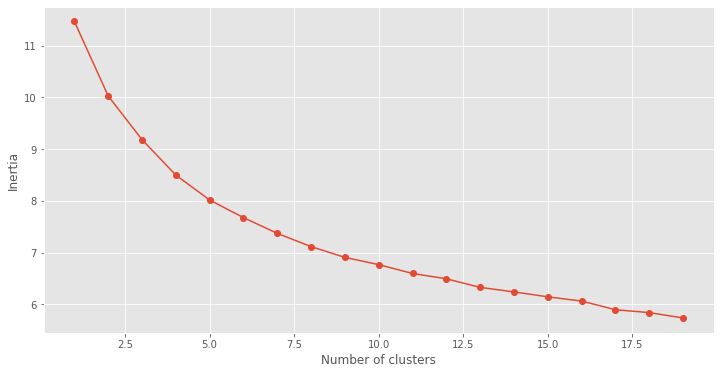

In [50]:
#fitting multiple k-means algorithms and storing the values in an empty list
BH_grouped_clustering = BH_grouped.drop('Neighborhood', 1)
Inertia_list = []
for K in range(1,20):
    kmeans = KMeans(n_clusters = K, init='k-means++', n_init = 40, random_state=0)
    kmeans.fit(BH_grouped_clustering)
    Inertia_list.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'Inertia':Inertia_list})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We can see that the slope of the function doesn't diminish significantly from observation to observation, which makes choosing the K value more difficult. For the sake of simplicity, we'll consider 8 a good value for Inertia and choose K = 5 for our clustering.

**Fitting the model with K equal 5:**

In [51]:
k_clusters = 5
kmeans = KMeans(n_clusters = k_clusters, init='k-means++', n_init = 40, random_state=0)
kmeans.fit(BH_grouped_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=40, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

**Creating a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood:**

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

BH_merged=BH_nbh_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
BH_merged = neighborhoods_venues_sorted.join(BH_merged.set_index('Neighborhood'), on='Neighborhood', how = 'inner')

BH_merged.reset_index(drop = True, inplace = True)
BH_merged

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
0,0,Acaiaca,Pizza Place,Juice Bar,Bakery,Ice Cream Shop,Snack Place,2565.0,0.382,6714.659686,-19.844662,-43.894791
1,2,Ademar Maldonado,Pizza Place,Acai House,Sushi Restaurant,Ice Cream Shop,Fast Food Restaurant,1803.0,0.163,11061.349693,-19.981895,-44.026621
2,0,Alpes,Snack Place,Brazilian Restaurant,Buffet,Ice Cream Shop,Burger Joint,2197.0,0.215,10218.604651,-19.954110,-43.964435
3,1,Alto Barroca,Bakery,Pizza Place,Dessert Shop,Café,Burger Joint,5213.0,0.315,16549.206349,-19.933174,-43.969077
4,4,Alto Vera Cruz,Bakery,Ice Cream Shop,Pizza Place,Acai House,Food Truck,21459.0,0.888,24165.540541,-19.910398,-43.891044
...,...,...,...,...,...,...,...,...,...,...,...,...
169,3,Vila São Paulo,Burger Joint,Food Truck,Acai House,Snack Place,Food Court,1898.0,0.074,25648.648649,-19.866049,-43.923430
170,1,Vila Trinta e Um de Março,Brazilian Restaurant,Pizza Place,Bakery,BBQ Joint,Ice Cream Shop,1525.0,0.054,28240.740741,-19.920415,-44.000970
171,4,Vila Vista Alegre,Bakery,Ice Cream Shop,Dessert Shop,Burger Joint,Snack Place,11413.0,0.370,30845.945946,-19.954209,-43.991601
172,2,Vila Átila de Paiva,Fast Food Restaurant,Pizza Place,BBQ Joint,Churrascaria,Bakery,1582.0,0.036,43944.444444,-19.979341,-44.031612


**Visualizing the resulting clusters:**

In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BH_merged['Latitude'], BH_merged['Longitude'], BH_merged['Neighborhood'], BH_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Analyzing Cluster 0:**

In [70]:
Cluster_0 = BH_merged[BH_merged['Cluster Labels'] == 0]
Cluster_0.set_index('Neighborhood').head(5)

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
Neighborhood,,,,,,,,,,,
Acaiaca,0,Pizza Place,Juice Bar,Bakery,Ice Cream Shop,Snack Place,2565.0,0.382,6714.659686,-19.844662,-43.894791
Alpes,0,Snack Place,Brazilian Restaurant,Buffet,Ice Cream Shop,Burger Joint,2197.0,0.215,10218.604651,-19.954110,-43.964435
Aparecida Sétima Seção,0,Ice Cream Shop,Bakery,Acai House,Burger Joint,Food Court,4917.0,0.476,10329.831933,-19.890793,-43.961655
Barroca,0,Snack Place,Brazilian Restaurant,Pizza Place,Bakery,Ice Cream Shop,3311.0,0.240,13795.833333,-19.931433,-43.963553
Beira-Linha,0,Ice Cream Shop,Acai House,Dessert Shop,Bakery,Belgian Restaurant,4132.0,0.231,17887.445887,-19.839455,-43.897062


In [82]:
Cluster_0_sum = Cluster_0[['1st Most Common Venue',
           '2nd Most Common Venue',
           '3rd Most Common Venue',
           '4th Most Common Venue',
           '5th Most Common Venue']].apply(pd.value_counts).fillna(0)

Cluster_0_sum = Cluster_0_sum.sum(axis=1).sort_values(ascending=False).to_frame()
Cluster_0_sum.columns = ['Sum']
Cluster_0_n_venues = 5 * len(Cluster_0.index.tolist())
Cluster_0_sum['Frequency'] = Cluster_0_sum['Sum']/Cluster_0_n_venues

print("Frequency of appearence among 5 most popular venue categories for each neighborhood:")
Cluster_0_sum.head(5)

Frequency of appearence among 5 most popular venue categories for each neighborhood:


,Sum,Frequency
Ice Cream Shop,21.0,0.182609
Bakery,17.0,0.147826
Snack Place,16.0,0.139130
Pizza Place,11.0,0.095652
Acai House,8.0,0.069565


Neighborhoods that belong to Cluster 0 have a lot of Ice Cream Shops, Bakeries and Snack Places.

**Analyzing Cluster 1:**

In [83]:
Cluster_1 = BH_merged[BH_merged['Cluster Labels'] == 1]
Cluster_1.set_index('Neighborhood').head(5)

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
Neighborhood,,,,,,,,,,,
Alto Barroca,1,Bakery,Pizza Place,Dessert Shop,Café,Burger Joint,5213.0,0.315,16549.206349,-19.933174,-43.969077
Barro Preto,1,Brazilian Restaurant,Restaurant,Snack Place,Café,Burger Joint,6183.0,1.094,5651.736746,-19.923382,-43.952011
Boa Viagem,1,Café,Brazilian Restaurant,Snack Place,Coffee Shop,Burger Joint,4564.0,0.235,19421.276596,-19.928402,-43.934948
Buritis,1,BBQ Joint,Sandwich Place,Fast Food Restaurant,Burger Joint,Pizza Place,29374.0,3.823,7683.494638,-19.976579,-43.967416
Caiçaras,1,Brazilian Restaurant,Burger Joint,Bakery,Fried Chicken Joint,Japanese Restaurant,13150.0,2.246,5854.853072,-19.899701,-43.965256


In [84]:
Cluster_1_sum = Cluster_1[['1st Most Common Venue',
           '2nd Most Common Venue',
           '3rd Most Common Venue',
           '4th Most Common Venue',
           '5th Most Common Venue']].apply(pd.value_counts).fillna(0)

Cluster_1_sum = Cluster_1_sum.sum(axis=1).sort_values(ascending=False).to_frame()
Cluster_1_sum.columns = ['Sum']
Cluster_1_n_venues = 5 * len(Cluster_1.index.tolist())
Cluster_1_sum['Frequency'] = Cluster_1_sum['Sum']/Cluster_1_n_venues

print("Frequency of appearence among 5 most popular venue categories for each neighborhood:")
Cluster_1_sum.head(5)

Frequency of appearence among 5 most popular venue categories for each neighborhood:


,Sum,Frequency
Brazilian Restaurant,54.0,0.163636
Bakery,43.0,0.130303
Restaurant,32.0,0.096970
Burger Joint,27.0,0.081818
Pizza Place,26.0,0.078788


Neighborhoods that belong to Cluster 1 have a lot of Brazilian Restaurants and Bakeries.

**Analyzing Cluster 2:**

In [85]:
Cluster_2 = BH_merged[BH_merged['Cluster Labels'] == 2]
Cluster_2.set_index('Neighborhood').head(5)

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
Neighborhood,,,,,,,,,,,
Ademar Maldonado,2,Pizza Place,Acai House,Sushi Restaurant,Ice Cream Shop,Fast Food Restaurant,1803.0,0.163,11061.349693,-19.981895,-44.026621
Barreiro,2,Pizza Place,Coffee Shop,BBQ Joint,Ice Cream Shop,Bakery,10114.0,1.583,6389.134555,-20.007277,-44.006951
Brasil Industrial,2,Bakery,Pizza Place,Snack Place,Burger Joint,Deli / Bodega,7030.0,0.625,11248.000000,-19.999976,-44.014430
Camargos,2,Bakery,Pizza Place,Brazilian Restaurant,Food Truck,Japanese Restaurant,13088.0,1.850,7074.594595,-19.940069,-44.018565
Cardoso,2,Pizza Place,Bakery,Brazilian Restaurant,Ice Cream Shop,Deli / Bodega,10582.0,0.945,11197.883598,-20.002636,-44.007380


In [86]:
Cluster_2_sum = Cluster_2[['1st Most Common Venue',
           '2nd Most Common Venue',
           '3rd Most Common Venue',
           '4th Most Common Venue',
           '5th Most Common Venue']].apply(pd.value_counts).fillna(0)

Cluster_2_sum = Cluster_2_sum.sum(axis=1).sort_values(ascending=False).to_frame()
Cluster_2_sum.columns = ['Sum']
Cluster_2_n_venues = 5 * len(Cluster_2.index.tolist())
Cluster_2_sum['Frequency'] = Cluster_2_sum['Sum']/Cluster_2_n_venues

print("Frequency of appearence among 5 most popular venue categories for each neighborhood:")
Cluster_2_sum.head(5)

Frequency of appearence among 5 most popular venue categories for each neighborhood:


,Sum,Frequency
Pizza Place,20.0,0.20
Bakery,19.0,0.19
BBQ Joint,8.0,0.08
Acai House,6.0,0.06
Brazilian Restaurant,5.0,0.05


Neighborhoods that belong to Cluster 2 have a lot of Pizza Places and Bakeries.

**Analyzing Cluster 3:**

In [87]:
Cluster_3 = BH_merged[BH_merged['Cluster Labels'] == 3]
Cluster_3.set_index('Neighborhood').head(5)

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
Neighborhood,,,,,,,,,,,
Alípio de Melo,3,Bakery,Burger Joint,Ice Cream Shop,BBQ Joint,Sandwich Place,9530.0,1.181,8069.432684,-19.892261,-44.003459
Araguaia,3,Acai House,Bakery,Mineiro Restaurant,Burger Joint,Gluten-free Restaurant,14635.0,1.344,10889.136905,-19.988673,-44.002195
Boa Vista,3,Burger Joint,Bakery,Food Truck,Japanese Restaurant,Pizza Place,17574.0,1.248,14081.730769,-19.894071,-43.903674
Bom Jesus,3,BBQ Joint,Ice Cream Shop,Brazilian Restaurant,Burger Joint,Bakery,3615.0,0.275,13145.454545,-19.895958,-43.954394
Cabana do Pai Tomás,3,Bakery,Burger Joint,BBQ Joint,Restaurant,Food Truck,17994.0,0.504,35702.380952,-19.946048,-44.000433


In [88]:
Cluster_3_sum = Cluster_3[['1st Most Common Venue',
           '2nd Most Common Venue',
           '3rd Most Common Venue',
           '4th Most Common Venue',
           '5th Most Common Venue']].apply(pd.value_counts).fillna(0)

Cluster_3_sum = Cluster_3_sum.sum(axis=1).sort_values(ascending=False).to_frame()
Cluster_3_sum.columns = ['Sum']
Cluster_3_n_venues = 5 * len(Cluster_3.index.tolist())
Cluster_3_sum['Frequency'] = Cluster_3_sum['Sum']/Cluster_3_n_venues

print("Frequency of appearence among 5 most popular venue categories for each neighborhood:")
Cluster_3_sum.head(5)

Frequency of appearence among 5 most popular venue categories for each neighborhood:


,Sum,Frequency
Burger Joint,35.0,0.194444
Bakery,30.0,0.166667
Ice Cream Shop,15.0,0.083333
Pizza Place,13.0,0.072222
BBQ Joint,11.0,0.061111


Neighborhoods that belong to Cluster 3 have a lot of Burger Joints and Bakeries.

**Analyzing Cluster 4:**

In [89]:
Cluster_4 = BH_merged[BH_merged['Cluster Labels'] == 4]
Cluster_4.set_index('Neighborhood').head(5)

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
Neighborhood,,,,,,,,,,,
Alto Vera Cruz,4,Bakery,Ice Cream Shop,Pizza Place,Acai House,Food Truck,21459.0,0.888,24165.540541,-19.910398,-43.891044
Betânia,4,Bakery,Burger Joint,Pizza Place,Restaurant,Hot Dog Joint,12054.0,1.311,9194.508009,-19.958611,-43.992225
Cenáculo,4,Bakery,Dumpling Restaurant,Food Truck,Café,Pizza Place,2299.0,0.327,7030.581040,-19.807159,-43.964026
Cinquentenário,4,Bakery,Ice Cream Shop,Restaurant,Snack Place,Acai House,5460.0,0.694,7867.435159,-19.955540,-43.982016
Diamante,4,Bakery,Food Truck,Acai House,BBQ Joint,Brazilian Restaurant,11979.0,1.844,6496.203905,-19.992422,-44.019212


In [90]:
Cluster_4_sum = Cluster_4[['1st Most Common Venue',
           '2nd Most Common Venue',
           '3rd Most Common Venue',
           '4th Most Common Venue',
           '5th Most Common Venue']].apply(pd.value_counts).fillna(0)

Cluster_4_sum = Cluster_4_sum.sum(axis=1).sort_values(ascending=False).to_frame()
Cluster_4_sum.columns = ['Sum']
Cluster_4_n_venues = 5 * len(Cluster_4.index.tolist())
Cluster_4_sum['Frequency'] = Cluster_4_sum['Sum']/Cluster_4_n_venues

print("Frequency of appearence among 5 most popular venue categories for each neighborhood:")
Cluster_4_sum.head(5)

Frequency of appearence among 5 most popular venue categories for each neighborhood:


,Sum,Frequency
Bakery,29.0,0.200000
Ice Cream Shop,18.0,0.124138
Pizza Place,12.0,0.082759
Burger Joint,9.0,0.062069
Brazilian Restaurant,8.0,0.055172


Neighborhoods that belong to Cluster 4 have a lot of Bakeries and Ice Cream Shops.

**Generating visualizations for the results:**

Text(0.5, 0, 'Frequency')

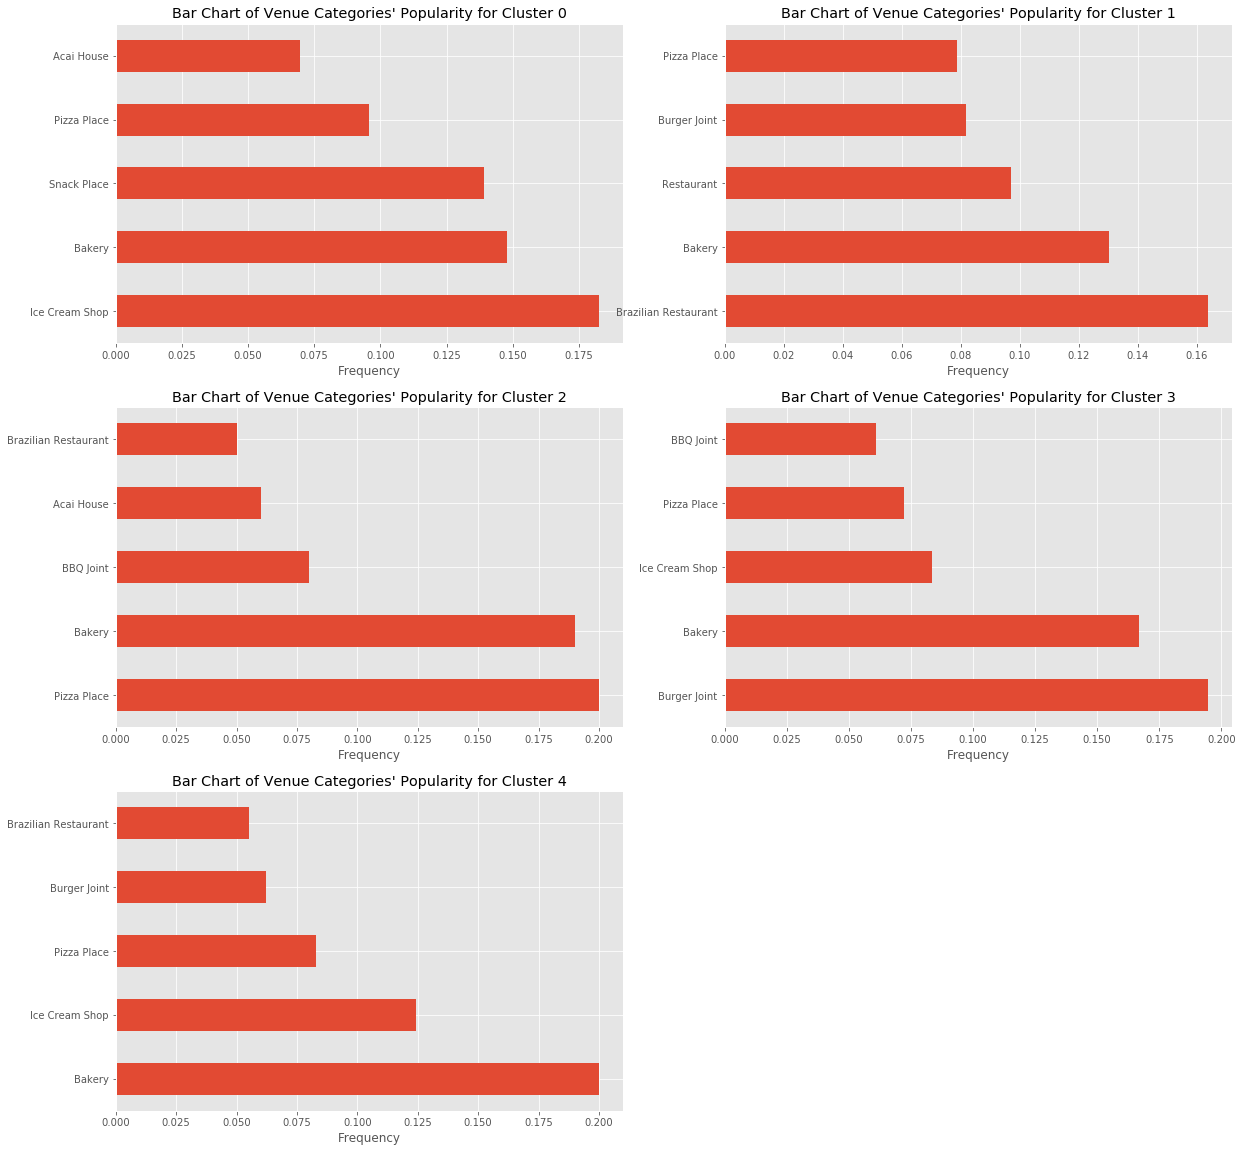

In [96]:
fig = plt.figure()

ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 2)
ax2 = fig.add_subplot(3, 2, 3)
ax3 = fig.add_subplot(3, 2, 4)
ax4 = fig.add_subplot(3, 2, 5)

Cluster_0_sum['Frequency'].head(5).plot(kind='barh', figsize=(20, 20), ax=ax0)
ax0.set_title('Bar Chart of Venue Categories\' Popularity for Cluster 0')
ax0.set_xlabel('Frequency')

Cluster_1_sum['Frequency'].head(5).plot(kind='barh', figsize=(20, 20), ax=ax1)
ax1.set_title('Bar Chart of Venue Categories\' Popularity for Cluster 1')
ax1.set_xlabel('Frequency')

Cluster_2_sum['Frequency'].head(5).plot(kind='barh', figsize=(20, 20), ax=ax2)
ax2.set_title('Bar Chart of Venue Categories\' Popularity for Cluster 2')
ax2.set_xlabel('Frequency')

Cluster_3_sum['Frequency'].head(5).plot(kind='barh', figsize=(20, 20), ax=ax3)
ax3.set_title('Bar Chart of Venue Categories\' Popularity for Cluster 3')
ax3.set_xlabel('Frequency')

Cluster_4_sum['Frequency'].head(5).plot(kind='barh', figsize=(20, 20), ax=ax4)
ax4.set_title('Bar Chart of Venue Categories\' Popularity for Cluster 4')
ax4.set_xlabel('Frequency')

**Looking for business opportunities:**

Now that we have the most popular food venue categories for each cluster, we can search for neighborhoods within each one of them that have few or none establishments of the most popular category. It is reasonable to assume that it is worth it looking further into these neighborhoods, because they were assigned to a determined cluster due to similarity with other neighborhoods. Hence, if they don't posses the most common feature among the group, it must be because of some particularity of the regions or simply represent an untapped potential for a successful food establishment business.

**Opportunities in Cluster 0:**

If an empty dataframe shows up, it means that all neighborhoods of this cluster already have the cluster's most popular venue among its 5 most popular venues.

In [103]:
most_pop = Cluster_0_sum.index[0]
print("These neighborhoods might be good places to open {}s.".format(most_pop))
Cluster_0[((Cluster_0['1st Most Common Venue'] == most_pop) | (Cluster_0['2nd Most Common Venue'] == most_pop) |
          (Cluster_0['3rd Most Common Venue'] == most_pop) | (Cluster_0['4th Most Common Venue'] == most_pop) |
          (Cluster_0['5th Most Common Venue'] == most_pop)) != True]

These neighborhoods might be good places to open Ice Cream Shops.


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
110,0,Pedreira Prado Lopes,Buffet,Food Truck,Snack Place,Pizza Place,Café,4453.0,0.155,28729.032258,-19.902127,-43.949798
142,0,São Cristóvão,Snack Place,Bakery,Pizza Place,Food Truck,Comfort Food Restaurant,2981.0,0.311,9585.209003,-19.901022,-43.945278


**Opportunities in Cluster 1:**

If an empty dataframe shows up, it means that all neighborhoods of this cluster already have the cluster's most popular venue among its 5 most popular venues.

In [104]:
most_pop = Cluster_1_sum.index[0]
print("These neighborhoods might be good places to open {}s.".format(most_pop))
Cluster_1[((Cluster_1['1st Most Common Venue'] == most_pop) | (Cluster_1['2nd Most Common Venue'] == most_pop) |
          (Cluster_1['3rd Most Common Venue'] == most_pop) | (Cluster_1['4th Most Common Venue'] == most_pop) |
          (Cluster_1['5th Most Common Venue'] == most_pop)) != True]

These neighborhoods might be good places to open Brazilian Restaurants.


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
3,1,Alto Barroca,Bakery,Pizza Place,Dessert Shop,Café,Burger Joint,5213.0,0.315,16549.206349,-19.933174,-43.969077
17,1,Buritis,BBQ Joint,Sandwich Place,Fast Food Restaurant,Burger Joint,Pizza Place,29374.0,3.823,7683.494638,-19.976579,-43.967416
26,1,Carmo,Italian Restaurant,Pizza Place,Bakery,Burger Joint,Café,3816.0,0.314,12152.866242,-19.943443,-43.932093
35,1,Conjunto Celso Machado,Restaurant,Food Truck,Pizza Place,Ice Cream Shop,Bakery,2696.0,0.331,8145.015106,-19.885740,-44.008514
54,1,Fernão Dias,Restaurant,Ice Cream Shop,Pizza Place,Food Truck,BBQ Joint,4190.0,0.505,8297.029703,-19.872444,-43.917412
60,1,Grajaú,Bakery,Restaurant,Dessert Shop,Ice Cream Shop,Acai House,6279.0,0.426,14739.436620,-19.938527,-43.965204
84,1,Maria Helena,Acai House,Hot Dog Joint,Snack Place,Fast Food Restaurant,Dessert Shop,7683.0,0.734,10467.302452,-19.798858,-43.994856
91,1,Mineirão,Sandwich Place,Acai House,Bakery,Churrascaria,Italian Restaurant,4235.0,0.394,10748.730964,-19.865888,-43.971069
139,1,Sion,Japanese Restaurant,Bakery,Coffee Shop,Pizza Place,Restaurant,19700.0,1.195,16485.355649,-19.949362,-43.932587
141,1,São Bernardo,Bakery,Acai House,Pizza Place,Restaurant,Burger Joint,9092.0,0.939,9682.641108,-19.850304,-43.937988


**Opportunities in Cluster 2:**

If an empty dataframe shows up, it means that all neighborhoods of this cluster already have the cluster's most popular venue among its 5 most popular venues.

In [105]:
most_pop = Cluster_2_sum.index[0]
print("These neighborhoods might be good places to open {}s.".format(most_pop))
Cluster_2[((Cluster_2['1st Most Common Venue'] == most_pop) | (Cluster_2['2nd Most Common Venue'] == most_pop) |
          (Cluster_2['3rd Most Common Venue'] == most_pop) | (Cluster_2['4th Most Common Venue'] == most_pop) |
          (Cluster_2['5th Most Common Venue'] == most_pop)) != True]

These neighborhoods might be good places to open Pizza Places.


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude


**Opportunities in Cluster 3:**

If an empty dataframe shows up, it means that all neighborhoods of this cluster already have the cluster's most popular venue among its 5 most popular venues.

In [106]:
most_pop = Cluster_3_sum.index[0]
print("These neighborhoods might be good places to open {}s.".format(most_pop))
Cluster_3[((Cluster_3['1st Most Common Venue'] == most_pop) | (Cluster_3['2nd Most Common Venue'] == most_pop) |
          (Cluster_3['3rd Most Common Venue'] == most_pop) | (Cluster_3['4th Most Common Venue'] == most_pop) |
          (Cluster_3['5th Most Common Venue'] == most_pop)) != True]

These neighborhoods might be good places to open Burger Joints.


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
120,3,Rio Branco,Sandwich Place,Bakery,Ice Cream Shop,Churrascaria,Pizza Place,12768.0,1.339,9535.474235,-19.817762,-43.982228


**Opportunities in Cluster 4:**

If an empty dataframe shows up, it means that all neighborhoods of this cluster already have the cluster's most popular venue among its 5 most popular venues.

In [107]:
most_pop = Cluster_4_sum.index[0]
print("These neighborhoods might be good places to open {}s.".format(most_pop))
Cluster_4[((Cluster_4['1st Most Common Venue'] == most_pop) | (Cluster_4['2nd Most Common Venue'] == most_pop) |
          (Cluster_4['3rd Most Common Venue'] == most_pop) | (Cluster_4['4th Most Common Venue'] == most_pop) |
          (Cluster_4['5th Most Common Venue'] == most_pop)) != True]

These neighborhoods might be good places to open Bakerys.


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Population,Area (km^2),People per km^2,Latitude,Longitude
